# Starbucks Capstone Challenge

## Part II: Exploratory Analysis

## Table of Content
[1 Import Packages and Load Data](#1-bullet) <br>
[2 Analysing df_member](#2-bullet) <br>
&emsp;[2.1 Years since Registration](#2.1-bullet) <br>
&emsp;[2.2 Days till Offer Completion per Member](#2.2-bullet) <br>
&emsp;[2.3 Purchase Behaviour](#2.3-bullet) <br>
&emsp;[2.4 Usage of Offer Types](#2.4-bullet) <br>
[3 Analysing df_mab](#3-bullet) <br>
&emsp;[3.1 Median Amount by Offer](#3.1-bullet) <br>
&emsp;[3.2 Offer Performance Distribution](#3.2-bullet) <br>

## 1 Import Packages and Load Data <a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_member = pd.read_csv('./data/df_member.csv', sep='\t')
df_mab = pd.read_csv('./data/df_mab.csv', sep='\t')

## 2 Analysing df_member <a class="anchor" id="2-bullet"></a>

In [3]:
df_member['compl_offers_cat'] = np.where(df_member['compl_offers']==0,'0',np.nan)
df_member['compl_offers_cat'] = np.where(df_member['compl_offers']>=1,'1-3',df_member['compl_offers_cat'])
df_member['compl_offers_cat'] = np.where(df_member['compl_offers']>=4,'4-6',df_member['compl_offers_cat'])

df_member.head(5)

,member_id,nr_purch,nr_purch_offer,amount_sum,amount_median,amount_std,compl_offers,used_bogo,used_disc,used_info,mean_hrs_compl,nr_NUO,nr_dist_NUO,sum_viewed_NUO,nr_bogo_NUO,nr_disc_NUO,nr_info_NUO,days_reg,compl_offers_cat
0,0009655768c64bdeb2e877511632db8f,8.0,2.0,127.60,13.835,6.572805,2,0.0,0.0,2.0,39.0,2.0,2.0,2.0,1.0,1.0,0.0,462,1-3
1,00116118485d4dfda04fdbaba9a87b5c,3.0,0.0,4.09,0.700,1.601572,0,0.0,0.0,0.0,NaN,2.0,1.0,2.0,2.0,0.0,0.0,93,0
2,0011e0d4e6b944f998e987f904e8c1e5,6.0,3.0,101.51,17.770,6.164292,3,1.0,2.0,0.0,90.0,2.0,2.0,2.0,0.0,0.0,2.0,199,1-3
3,0020c2b971eb4e9188eac86d93036a77,8.0,2.0,196.86,24.350,6.331932,2,1.0,1.0,0.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,875,1-3
4,0020ccbbb6d84e358d3414a3ff76cffd,9.0,4.0,154.05,12.755,4.284117,4,2.0,1.0,4.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,623,4-6


In [4]:
df_member.describe()

,nr_purch,nr_purch_offer,amount_sum,amount_median,amount_std,compl_offers,used_bogo,used_disc,used_info,mean_hrs_compl,nr_NUO,nr_dist_NUO,sum_viewed_NUO,nr_bogo_NUO,nr_disc_NUO,nr_info_NUO,days_reg
count,16578.000000,16578.000000,16578.000000,16578.000000,16198.000000,16578.000000,16578.000000,16578.000000,16578.000000,12923.000000,12742.000000,12742.000000,12742.000000,12742.000000,12742.00000,12742.000000,16578.000000
mean,8.257570,2.386959,109.802377,11.850895,8.409843,1.764567,0.818977,1.210158,0.637049,46.654644,2.053916,1.831973,2.053916,1.083189,0.67305,0.297677,525.864338
std,4.897589,2.232040,130.676350,11.707421,28.871429,1.402867,1.224850,1.778529,1.255911,38.531955,1.127322,0.932678,1.127322,0.928739,0.82348,0.531402,412.285806
min,1.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000
25%,5.000000,1.000000,24.250000,2.660000,2.206188,1.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,214.000000
50%,7.000000,2.000000,74.815000,10.970000,3.903496,2.000000,0.000000,1.000000,0.000000,36.000000,2.000000,2.000000,2.000000,1.000000,0.00000,0.000000,365.000000
75%,11.000000,4.000000,154.682500,19.530000,6.105841,3.000000,1.000000,2.000000,1.000000,66.000000,3.000000,2.000000,3.000000,2.000000,1.00000,1.000000,801.000000
max,36.000000,21.000000,1836.860000,510.520000,571.116005,6.000000,13.000000,21.000000,14.000000,240.000000,6.000000,6.000000,6.000000,6.000000,5.00000,4.000000,1824.000000


### 2.1 Years since Registration <a class="anchor" id="2.1-bullet"></a>

Mean Years since Registration: 1.44 years
Mean Years since Registration (Members with 0 completed offers): 0.96 years
Mean Years since Registration (Members with 1-3 completed offers): 1.55 years
Mean Years since Registration (Members with 4-6 completed offers): 1.71 years


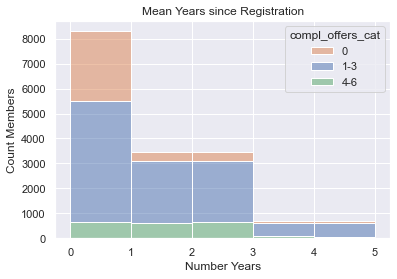

In [5]:
hue_order = ['0', '1-3', '4-6']

sns.histplot(x=df_member['days_reg']/365
             , binwidth = 1
             , hue = df_member['compl_offers_cat']
             , hue_order=hue_order
             , palette=["C1", "C0", "C2"]
             , multiple='stack'
             , alpha = 0.5)\
   .set(title='Mean Years since Registration'
             , xlabel = 'Number Years'
             , ylabel = 'Count Members')

print ("Mean Years since Registration: {:.02f} years".format(df_member['days_reg'].mean()/365))
print ("Mean Years since Registration (Members with 0 completed offers): {:.02f} years"\
       .format(df_member[df_member['compl_offers_cat'] == '0']['days_reg'].mean()/365))
print ("Mean Years since Registration (Members with 1-3 completed offers): {:.02f} years"\
       .format(df_member[df_member['compl_offers_cat'] == '1-3']['days_reg'].mean()/365))
print ("Mean Years since Registration (Members with 4-6 completed offers): {:.02f} years"\
       .format(df_member[df_member['compl_offers_cat'] == '4-6']['days_reg'].mean()/365))

### 2.2 Days till Offer Completion per Member <a class="anchor" id="2.2-bullet"></a>

Mean Days between View and Completion of an Offer: 1.94 days
Mean Days between View and Completion of an Offer (Members with 1-3 completed offers): 1.99 days
Mean Days between View and Completion of an Offer (Members with 4-6 completed offers): 1.69 days


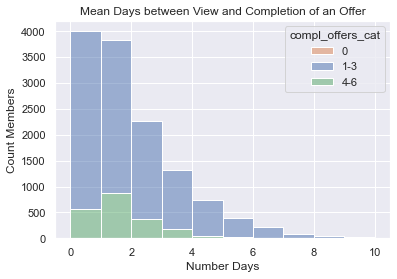

In [6]:
hue_order = ['0', '1-3', '4-6']

sns.histplot(x=df_member['mean_hrs_compl']/24
             , binwidth = 1
             , hue = df_member['compl_offers_cat']
             , hue_order=hue_order
             , palette=["C1", "C0", "C2"]
             , multiple='stack'
             , alpha = 0.5)\
   .set(title='Mean Days between View and Completion of an Offer'
             , xlabel = 'Number Days'
             , ylabel = 'Count Members')

print ("Mean Days between View and Completion of an Offer: {:.02f} days".format(df_member['mean_hrs_compl'].mean()/24))
print ("Mean Days between View and Completion of an Offer (Members with 1-3 completed offers): {:.02f} days"\
       .format(df_member[df_member['compl_offers_cat'] == '1-3']['mean_hrs_compl'].mean()/24))
print ("Mean Days between View and Completion of an Offer (Members with 4-6 completed offers): {:.02f} days"\
       .format(df_member[df_member['compl_offers_cat'] == '4-6']['mean_hrs_compl'].mean()/24))

### 2.3 Purchase Behaviour <a class="anchor" id="2.3-bullet"></a>

Average Number of Purchases per Member: 8.26
Average Number of Purchases with Offer Influence per Member: 2.39
Average Number of Completed Offers per Member: 1.76
Average Number of Not Completed Offers per Member: 2.05


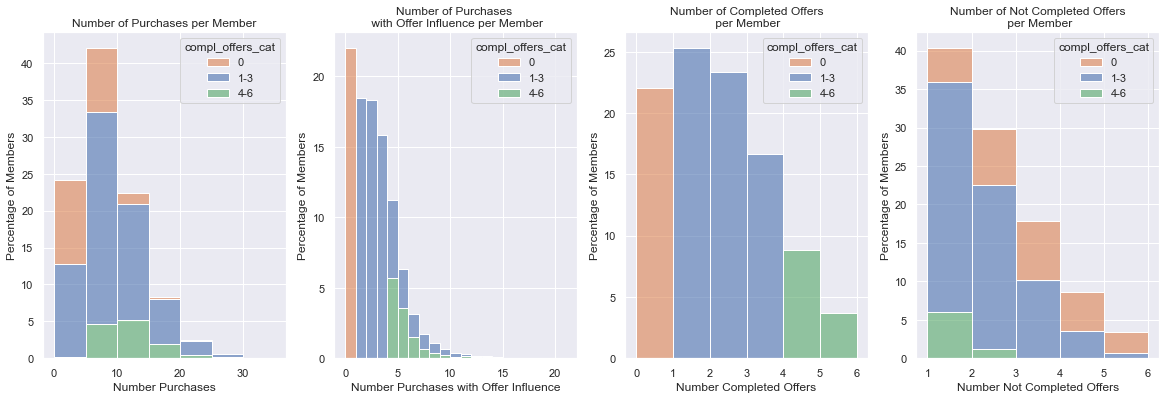

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))
hue_order = ['0', '1-3', '4-6']

sns.histplot(x=df_member['nr_purch']
             , ax=ax1
             , stat='percent'
             , binwidth = 5
             , binrange = (0,35)
             , hue = df_member['compl_offers_cat']
             , hue_order=hue_order
             , palette=["C1", "C0", "C2"]
             , multiple='stack'
             , alpha = 0.6)\
   .set(title='Number of Purchases per Member'
             , xlabel = 'Number Purchases'
             , ylabel = 'Percentage of Members')
sns.histplot(x=df_member['nr_purch_offer']
             , ax=ax2
             , stat='percent'
             , binwidth = 1
             , hue = df_member['compl_offers_cat']
             , hue_order=hue_order
             , palette=["C1", "C0", "C2"]
             , multiple='stack'
             , alpha = 0.6)\
   .set(title='Number of Purchases \n with Offer Influence per Member'
             , xlabel = 'Number Purchases with Offer Influence'
             , ylabel = 'Percentage of Members')
sns.histplot(x=df_member['compl_offers']
             , ax=ax3
             , stat='percent'
             , binwidth = 1
             , hue = df_member['compl_offers_cat']
             , hue_order=hue_order
             , palette=["C1", "C0", "C2"]
             , multiple='stack'
             , alpha = 0.6)\
   .set(title='Number of Completed Offers\n per Member'
             , xlabel = 'Number Completed Offers'
             , ylabel = 'Percentage of Members')
sns.histplot(x=df_member['nr_NUO']
             , ax=ax4
             , stat='percent'
             , binwidth = 1
             , hue = df_member['compl_offers_cat']
             , hue_order=hue_order
             , palette=["C1", "C0", "C2"]
             , multiple='stack'
             , alpha = 0.6)\
   .set(title='Number of Not Completed Offers\n per Member'
             , xlabel = 'Number Not Completed Offers'
             , ylabel = 'Percentage of Members')

print ("Average Number of Purchases per Member: {:.02f}".format(df_member['nr_purch'].mean()))
print ("Average Number of Purchases with Offer Influence per Member: {:.02f}".format(df_member['nr_purch_offer'].mean()))
print ("Average Number of Completed Offers per Member: {:.02f}".format(df_member['compl_offers'].mean()))
print ("Average Number of Not Completed Offers per Member: {:.02f}".format(df_member['nr_NUO'].mean()))

Most members made 5-10 purchases. Members with a higher number of purchases often have more completed offers.

### 2.4 Usage of Offer Types <a class="anchor" id="2.4-bullet"></a>

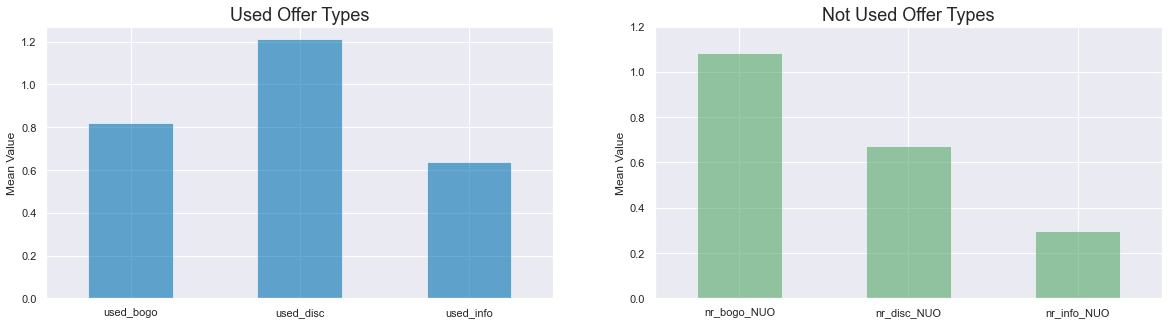

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.set(font_scale = 1.5)
sns.set_palette('colorblind')

fig = df_member[['used_bogo','used_disc','used_info']].mean().plot(kind='bar'
                                                                   , ax=ax1
                                                                   , ylabel = 'Mean Value'
                                                                   , title = 'Used Offer Types'
                                                                   , rot=0
                                                                   , alpha = 0.6)\
                                                              .title.set_size(18)
fig = df_member[['nr_bogo_NUO','nr_disc_NUO','nr_info_NUO']].mean().plot(kind='bar'
                                                                   , ax=ax2
                                                                   , ylabel = 'Mean Value'
                                                                   , ylim = (0,1.2)
                                                                   , title = 'Not Used Offer Types'
                                                                   , rot=0
                                                                   , color = 'g'
                                                                   , alpha = 0.6)\
                                                              .title.set_size(18)

plt.show()

On average each member uses 1.2 discount offers, 0.8 BOGO offers and 0.6 informational offers. On the other hand each member does not use about one BOGO offer and 0.7 discount offers.

## 3 Analysing df_mab <a class="anchor" id="3-bullet"></a>

In [9]:
df_mab.head(5)

,member_id,time,amount,offer_name,viewed,completed,offer_compl_rnk,performance,bogo,discount,informational,reward,difficulty,duration
0,02c083884c7d45b39cc68e1314fec56c,0,0.83,No_offer,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56,disc_df10_rw2_du7,1.0,1.0,1.0,2,0.0,1.0,0.0,2.0,10.0,7.0
2,54890f68699049c2a04d415abc25e717,0,13.23,No_offer,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0
3,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51,No_offer,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,fe97aa22dd3e48c8b143116a8403dd52,0,18.97,No_offer,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
df_mab.describe()

,time,amount,viewed,completed,offer_compl_rnk,performance,bogo,discount,informational,reward,difficulty,duration
count,169165.000000,169165.000000,169165.0,169165.000000,141523.000000,169165.000000,169165.000000,169165.000000,169165.000000,169165.000000,169165.000000,169165.000000
mean,374.895209,10.760523,1.0,0.809234,0.206701,2.174823,0.165531,0.172890,0.086265,1.748311,3.059031,3.312228
std,202.393439,28.280509,0.0,0.392906,0.404941,1.243141,0.371660,0.378154,0.280756,3.051985,4.746193,3.069364
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,204.000000,1.130000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,408.000000,5.790000,1.0,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,546.000000,16.250000,1.0,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,7.000000,5.000000
max,714.000000,1062.280000,1.0,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,20.000000,10.000000


### 3.1 Median Amount by Offer <a class="anchor" id="3.1-bullet"></a>

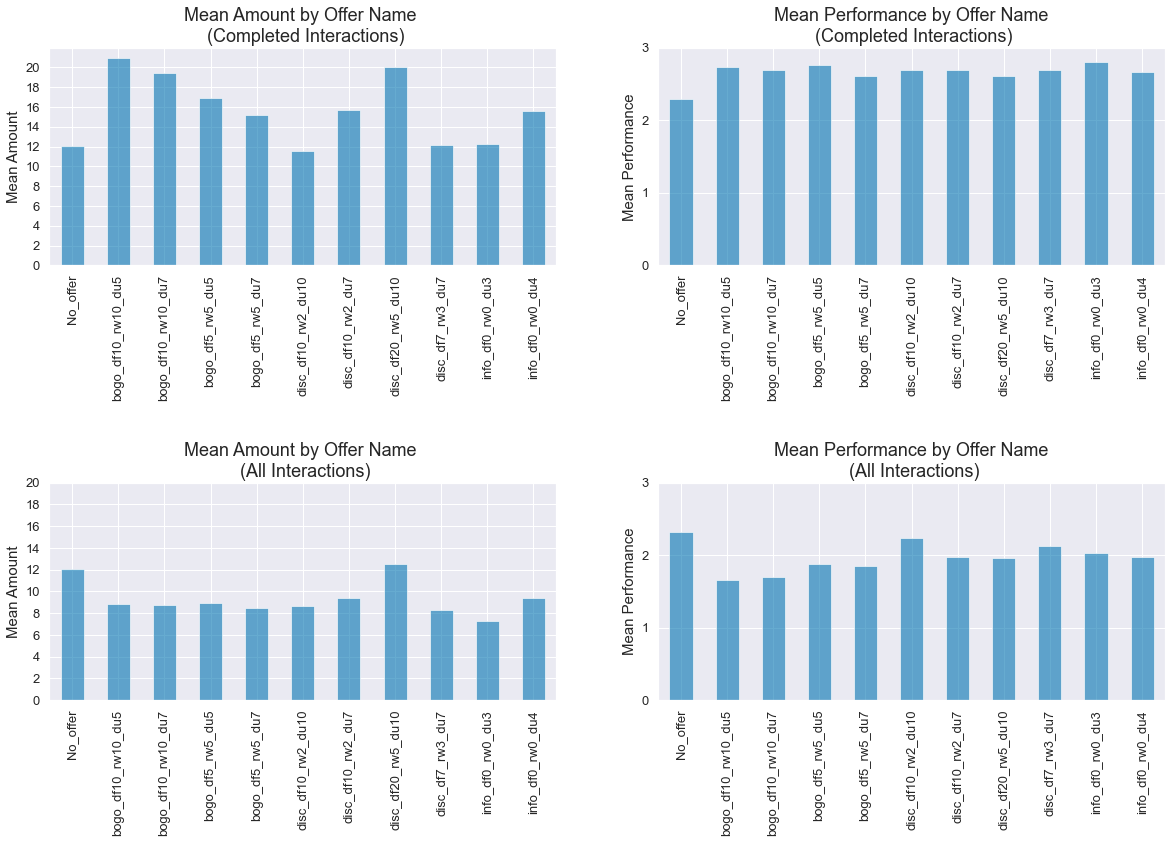

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
fig.subplots_adjust(hspace=1)

#Mean Amount by Offer Name (Completed Interactions)
a = df_mab[df_mab['completed']==1].groupby(['offer_name'])['amount'].mean()

a.plot(kind='bar', ax= ax1, alpha = 0.6, fontsize=13)
ax1.set_title('Mean Amount by Offer Name \n (Completed Interactions)', fontsize=18)
ax1.set_ylabel('Mean Amount', fontsize=15)
ax1.set_xlabel('')
ax1.set_yticks(np.arange(0, 22, 2))

#Mean Performance by Offer Name (Completed Interactions)
b = df_mab[df_mab['completed']==1].groupby(['offer_name'])['performance'].mean()

b.plot(kind='bar', ax= ax2, alpha = 0.6, fontsize=13)
ax2.set_title('Mean Performance by Offer Name\n (Completed Interactions)', fontsize=18)
ax2.set_ylabel('Mean Performance', fontsize=15)
ax2.set_xlabel('')
ax2.set_yticks(np.arange(0, 4, 1))

#Mean Amount by Offer Name (All Interactions)
c = df_mab.groupby(['offer_name'])['amount'].mean()

c.plot(kind='bar', ax= ax3, alpha = 0.6, fontsize=13)
ax3.set_title('Mean Amount by Offer Name \n (All Interactions)', fontsize=18)
ax3.set_ylabel('Mean Amount', fontsize=15)
ax3.set_xlabel('')
ax3.set_yticks(np.arange(0, 22, 2))

#Mean Performance by Offer Name (All Interactions)
d = df_mab.groupby(['offer_name'])['performance'].mean()

d.plot(kind='bar', ax= ax4, alpha = 0.6, fontsize=13)
ax4.set_title('Mean Performance by Offer Name\n (All Interactions)', fontsize=18)
ax4.set_ylabel('Mean Performance', fontsize=15)
ax4.set_xlabel('')
ax4.set_yticks(np.arange(0, 4, 1))
plt.show()

When completed the offer "bogo_df10_rw10_du5" achieves the highest mean amount. However, this offer is relatively difficult to complete. Consequently, when considering all interactions with this offer (also the ones without completion -> amount = 0) the mean amount is not the best anymore. When considering all interactions, the offer "disc_df20_rw5_du10" which is a 25% discount has the highest mean amount, followed by transactions without any offer. <br>
Similarly, transactions without offers have the highest average performance, when all interactions are considered, because not used offers have a performance of zero, whereas transactions without offer . 

### 3.2 Offer Performance Distribution<a class="anchor" id="3.2-bullet"></a>

Distribution of all offers:

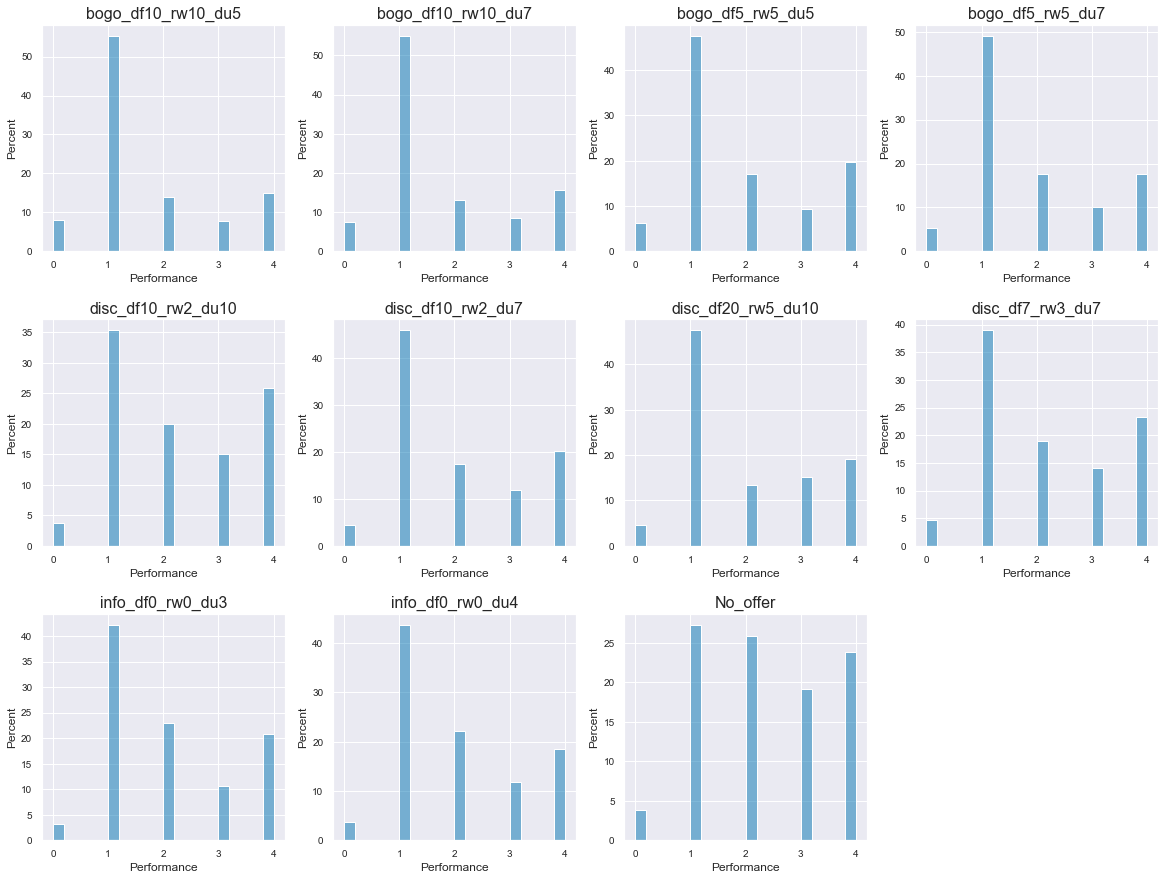

In [12]:
#list with offer names
a = df_mab['offer_name'].sort_values().unique().tolist()
a.append(a[0])
del a[0]

#plot performance distribution of offers
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3)

c = 0
for i in range(3):
    for j in range(4):
        if c <= 10:
            sns.histplot(x=df_mab[df_mab['offer_name']==a[c]]['performance']
                 , ax=axs[i,j]
                 , stat ='percent'
                 , binwidth = 0.2
                 , alpha = 0.5)
            axs[i,j].set_title(a[c], fontsize = 16)
            axs[i,j].set_ylabel('Percent', fontsize = 12) 
            axs[i,j].set_xlabel('Performance', fontsize = 12) 
            axs[i,j].tick_params(labelsize=10)
            c+=1
        else: 
            fig.delaxes(axs[i,j])


Distribution of only completed offers:

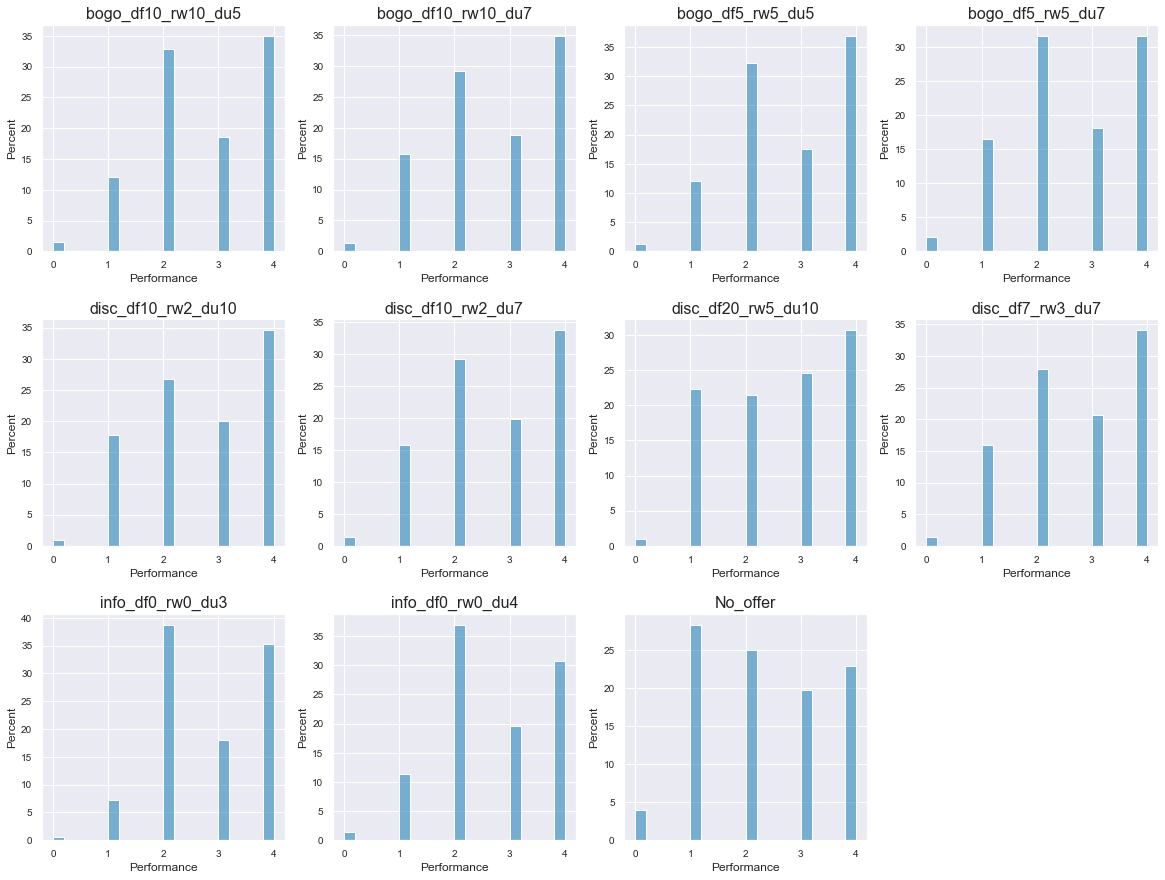

In [13]:
#plot performance distribution of offers
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3)

c = 0
for i in range(3):
    for j in range(4):
        if c <= 10:
            sns.histplot(x=df_mab[(df_mab['completed']==1) & (df_mab['offer_name']==a[c])]['performance']
                 , ax=axs[i,j]
                 , stat ='percent'
                 , binwidth = 0.2
                 , alpha = 0.5)
            axs[i,j].set_title(a[c], fontsize = 16)
            axs[i,j].set_ylabel('Percent', fontsize = 12) 
            axs[i,j].set_xlabel('Performance', fontsize = 12) 
            axs[i,j].tick_params(labelsize=10)
            c+=1
        else: 
            fig.delaxes(axs[i,j])

In [14]:
df_mab.groupby(['performance'])['offer_name'].count()

performance
0     7462
1    58339
2    38313
3    27265
4    37786
Name: offer_name, dtype: int64